In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import minimize

sns.set(context="talk")

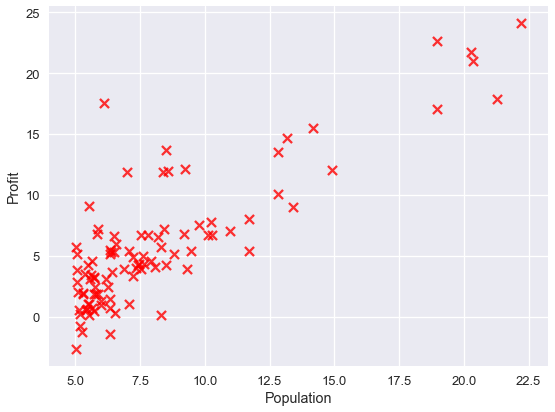

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [2]:
df = pd.read_csv("ex1data1.txt", names=["Population", "Profit"])
sns.lmplot(x="Population", y="Profit", data=df,
           fit_reg=False, # No regression line
           scatter_kws={'color': 'red'}, 
           markers='x', 
           size=6, # Height in inch
           aspect=1.33)  # Ratio of width to height
plt.show()
df.describe()

**Define hypothesis and cost function**

In [3]:
# Linear regression function
def hypo(theta, X):
    h = X.dot(theta)
    return h.reshape((-1, 1))

# Cost function
def costFun(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    return 1/(2*m) * np.sum((h-y)**2)

# Gradient function
def gradient(theta, X, y):
    m = len(y)
    h = hypo(theta, X)
    gradient = 1/m * (h - y).T.dot(X)
    return gradient.ravel()

X = df.values[:, 0:len(df.columns)-1]
y = df.values[:, len(df.columns)-1:len(df.columns)]
X = np.concatenate((np.ones([len(y), 1]), X), axis=1)
theta = np.zeros([len(df.columns)])

**Minimize cost function and find learned parameters theta**

In [4]:
res = minimize(costFun, theta, args=(X, y), jac=gradient)
print(res)

      fun: 4.4769713759803995
 hess_inv: array([[ 5.3476265 , -0.53380839],
       [-0.53380839,  0.06553471]])
      jac: array([ -4.05430521e-07,   9.03420783e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([-3.89578808,  1.19303448])


**Plot linear fit with scatter plot of data**

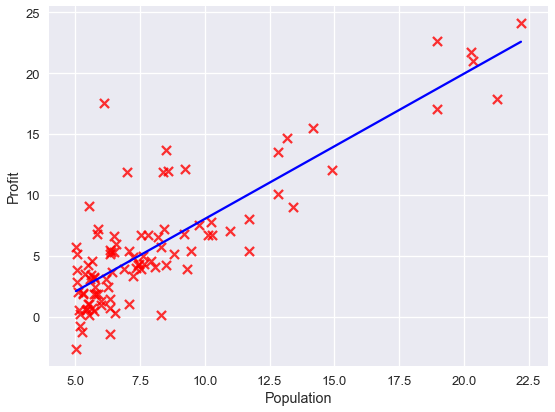

In [5]:
# Plot scatter
sns.lmplot(x="Population", y="Profit", data=df,
           fit_reg=False, # No regression line
           scatter_kws={'color': 'red'}, 
           markers='x', 
           size=6, # Height in inch
           aspect=1.33)  # Ratio of width to height
# Plot regression line
t = np.array([np.linspace(df.Population.min(), df.Population.max(), 100)]).T
f = hypo(res.x, np.concatenate((np.ones([len(t), 1]), t), axis=1))
plt.plot(t.flatten(), f.flatten(), 'b-')
plt.show()

**Predict values**

In [6]:
# Predict values for population sizes of 35,000 and 70,000
x_predict = np.array([1, 3.5])
y_predict = hypo(res.x, x_predict).ravel()[0]
print("For population = 35,000, we predict a profit of", y_predict*10000)
x_predict = np.array([1, 7])
y_predict = hypo(res.x, x_predict).ravel()[0]
print("For population = 70,000, we predict a profit of", y_predict*10000)

For population = 35,000, we predict a profit of 2798.32590552
For population = 70,000, we predict a profit of 44554.5325978
